In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


Text(0.7, 0.6, '$\\vec{g}=-g\\hat{y}$')

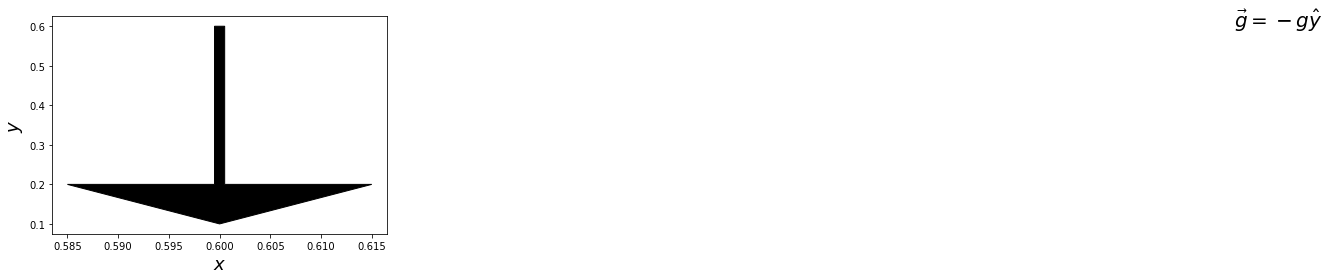

In [7]:
ax = plt.subplot(111)
fs = 18
ax.arrow(.6,.6,0,-.4,head_width=0.03, head_length=0.1, fc='k', ec='k')
ax.set_xlabel(r'$x$',fontsize=fs)
ax.set_ylabel(r'$y$',fontsize=fs)
ax.text(.7,.6,r'$\vec{g}=-g\hat{y}$',fontsize=fs+2)
    

Text(0.5, 1.0, 'Velocity with Constant Acceleration')

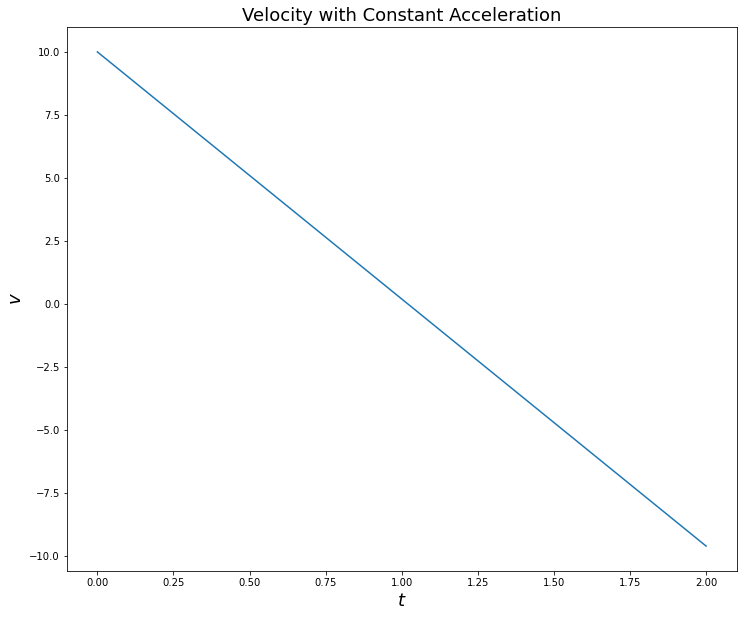

In [8]:

#First define a vector for time
texact = np.linspace(0,2,1000)
#Now define a constant for the initial velocity
v0 = 10 #in m/s
#Next, define the gravitational acceleration
g = -9.8 #in m/s
#Construct the velocity vector
vexact = g*texact + v0
#Plot for velocity with constant acceleration
fig = plt.figure(figsize=(12,10))
ax = fig.gca()
ax.plot(texact,vexact)
ax.set_xlabel(r'$t$',fontsize=fs)
ax.set_ylabel(r'$v$',fontsize=fs)
ax.set_title(r'Velocity with Constant Acceleration',fontsize=fs)
       

In [9]:
def euler_projectile_y(tsteps,ta,tb,y0,v0,theta):
    #Define delta t as just the distance between two adjacent points in our discretization
    #We may choose any two points because the spacing is uniform
    t = np.linspace(ta,tb,tsteps)
    deltat = t[1]-t[0]   #Make sure this is positive!

    #Let's make a vector (it can be full of zeros to start with) that will hold our position
    y = np.zeros([tsteps,1])
    #Now make a vector that will hold the velocities
    vy = np.zeros([tsteps,1])

    #Make the first entry of our position vector the initial position
    y[0] = y0
    #Make the first entry of the velocity vector the initial velocity
    vy[0] = np.sin(theta)*v0

    #Iterate over the time vector and find the position
    for i in range(tsteps-1):
        vy[i+1] = vy[i] + deltat*g
        y[i+1] = y[i] + deltat*vy[i]
    
    return [t,y,vy]

In [10]:
#Run the simulation
y0=0.0
results = euler_projectile_y(1000,0,2,0.0,v0,np.pi/2)
t = results[0]
y = results[1]
vy = results[2]


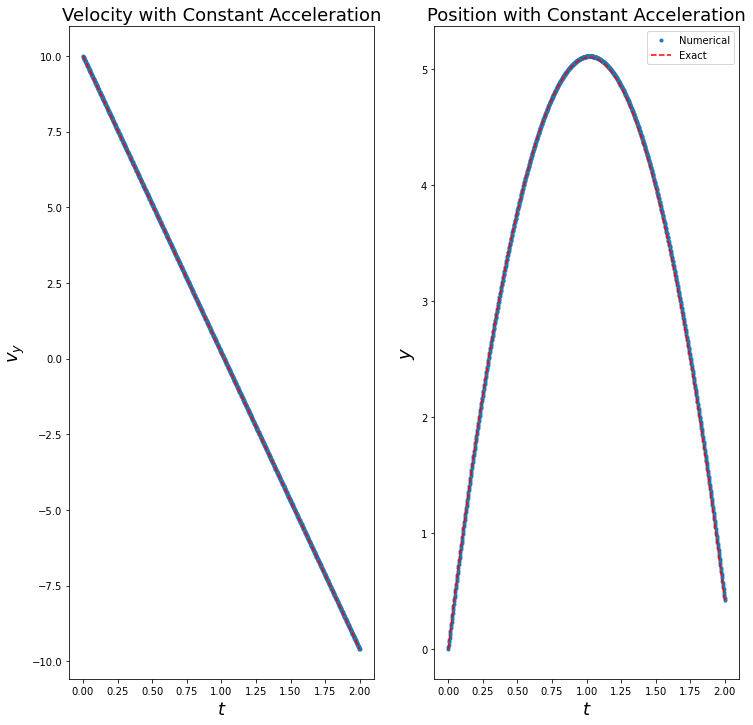

In [11]:
#Define our formula for the exact position in time
yexact = y0 + v0*texact + g/2*texact**2
fig, axes = plt.subplots(1,2,figsize=(12,12))
axes[0].plot(t,vy,'.')
axes[0].plot(texact,vexact,'r--')
axes[0].set_xlabel(r'$t$',fontsize=fs)
axes[0].set_ylabel(r'$v_y$',fontsize=fs)
axes[0].set_title('Velocity with Constant Acceleration',fontsize = fs)
axes[1].plot(t,y,'.',label='Numerical')
axes[1].plot(texact,yexact,'r--',label='Exact')
axes[1].set_xlabel(r'$t$',fontsize=fs)
axes[1].set_ylabel(r'$y$',fontsize=fs)
axes[1].set_title(r'Position with Constant Acceleration',fontsize=fs)
axes[1].legend(loc=1)

In [12]:
def euler_projectile_x(tsteps,ta,tb,x0,v0,theta):
    #Define delta t as just the distance between two adjacent points in our discretization
    #We may choose any two points because the spacing is uniform
    t = np.linspace(ta,tb,tsteps)
    deltat = t[1]-t[0]   #Make sure this is positive!

    #Let's make a vector (it can be full of zeros to start with) that will hold our position
    x = np.zeros([tsteps,1])
    #Now make a vector that will hold the velocities
    vx = np.zeros([tsteps,1])

    #Make the first entry of our position vector the initial position
    x[0] = x0
    #Make the first entry of the velocity vector the initial velocity
    vx[0] = np.cos(theta)*v0

    #Iterate over the time vector and find the position
    for i in range(tsteps-1):
        vx[i+1] = vx[i] 
        x[i+1] = x[i] + deltat*vx[i]
    
    return [t,x,vx]

In [13]:
#Define new initial velocities and positions
v0 = 30
theta = 35*np.pi/180
x0 = 0.0
y0 = 2.0
ta = 0
tb = 3.6
tsteps = 200
results = euler_projectile_x(tsteps,ta,tb,x0,v0,theta)
vx = results[2]
x = results[1]
results = euler_projectile_y(tsteps,ta,tb,y0,v0,theta)
y = results[1]
t = results[0]

(0.0, 88.46842078321112)

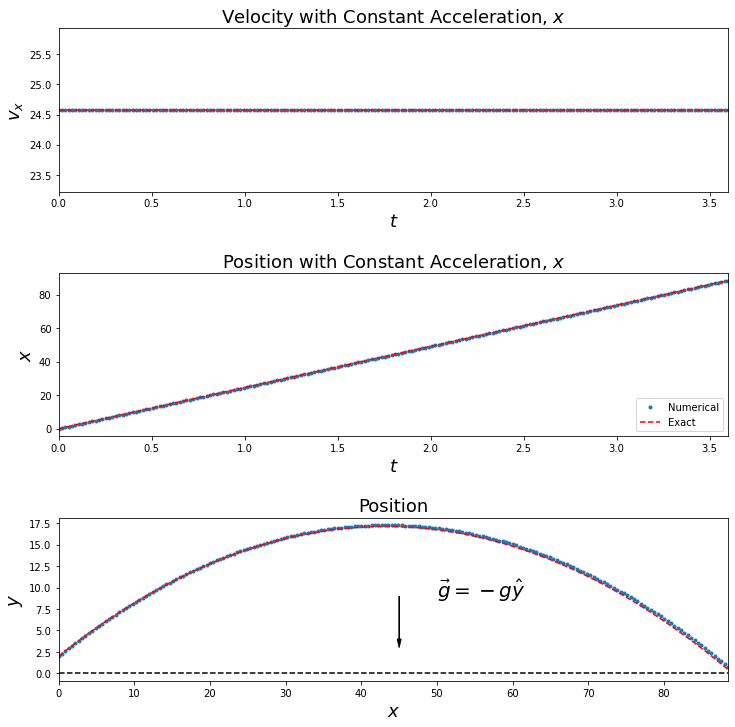

In [14]:
#Now plot the results
#Define our formula for the exact position in time
texact = np.linspace(ta,tb,1000)
yexact = y0 + v0*np.sin(theta)*texact + g/2*texact**2
xexact = v0*np.cos(theta)*texact
vxexact = v0*np.cos(theta)*np.ones([len(texact),1])
fig, axes = plt.subplots(3,1,figsize=(12,12))
plt.subplots_adjust(hspace=0.5)
axes[0].plot(t,vx,'.')
axes[0].plot(texact,vxexact,'r--')
axes[0].set_xlabel(r'$t$',fontsize=fs)
axes[0].set_ylabel(r'$v_x$',fontsize=fs)
axes[0].set_title(r'Velocity with Constant Acceleration, $x$',fontsize = fs)
axes[0].set_xlim([0,texact[-1]])
axes[1].plot(t,x,'.',label='Numerical')
axes[1].plot(texact,xexact,'r--',label='Exact')
axes[1].set_xlabel(r'$t$',fontsize=fs)
axes[1].set_ylabel(r'$x$',fontsize=fs)
axes[1].set_title(r'Position with Constant Acceleration, $x$',fontsize=fs)
axes[1].set_xlim([0,texact[-1]])
axes[1].legend(loc=4)
axes[2].plot(x,y,'.')
axes[2].plot(30*np.cos(35*np.pi/180)*texact,yexact,'--r')
axes[2].plot(xexact,np.zeros([len(xexact),1]),'k--')
axes[2].arrow(45,9,0,-5,head_width=0.5, head_length=1, fc='k', ec='k')
axes[2].text(50,9,r'$\vec{g}=-g\hat{y}$',fontsize=fs+2)
axes[2].set_xlabel(r'$x$',fontsize=fs)
axes[2].set_ylabel(r'$y$',fontsize=fs)
axes[2].set_title('Position',fontsize = fs)
axes[2].set_xlim([0,xexact[-1]])


In [15]:
def euler_projectile_air(tsteps,ta,tb,x0,y0,v0,theta,m,D):
    #First define our discretized time using our input beginning and end times with the desired number of steps.
    t = np.linspace(ta,tb,tsteps)
    #Define the timestep
    deltat = t[1]-t[0]
    
    #Next make vectors to store all of the velocities and positions for both x and y
    vx = np.zeros([tsteps,1])
    vy = np.zeros([tsteps,1])
    x = np.zeros([tsteps,1])
    y = np.zeros([tsteps,1])
    
    #Input all the initial conditions for velocity and position for x and y
    vx[0] = np.cos(theta)*v0
    vy[0] = np.sin(theta)*v0
    x[0] = x0
    y[0] = y0
    
    #Define g,b and C coefficients
    b = 1.6e-4*D
    c = 0.2*D**2
    g = 9.8
    
    #Update all of the positions and velocities in time
    for i in range(tsteps-1):
        #Update acceleration
        ax = -b/m*vx[i] - c/m*vx[i]*np.sqrt(vx[i]**2+vy[i]**2)
        ay = -g - b/m*vy[i] - c/m*vy[i]*np.sqrt(vx[i]**2+vy[i]**2)
        #Update velocity
        vx[i+1] = vx[i] + ax*deltat
        vy[i+1] = vy[i] + ay*deltat
        #Update position
        x[i+1] = x[i] + vx[i]*deltat
        y[i+1] = y[i] + vy[i]*deltat
        
    #Return all of the necessary vectors
    return [t,x,y,vx,vy]

In [16]:
#Run the simulation
results = euler_projectile_air(1000,0,3,0.0,2.0,20,55*np.pi/180,0.5,0.20)
t = results[0]
x = results[1]
y = results[2]
vx = results[3]
vy = results[4]


(0.0, 25.844449510791087)

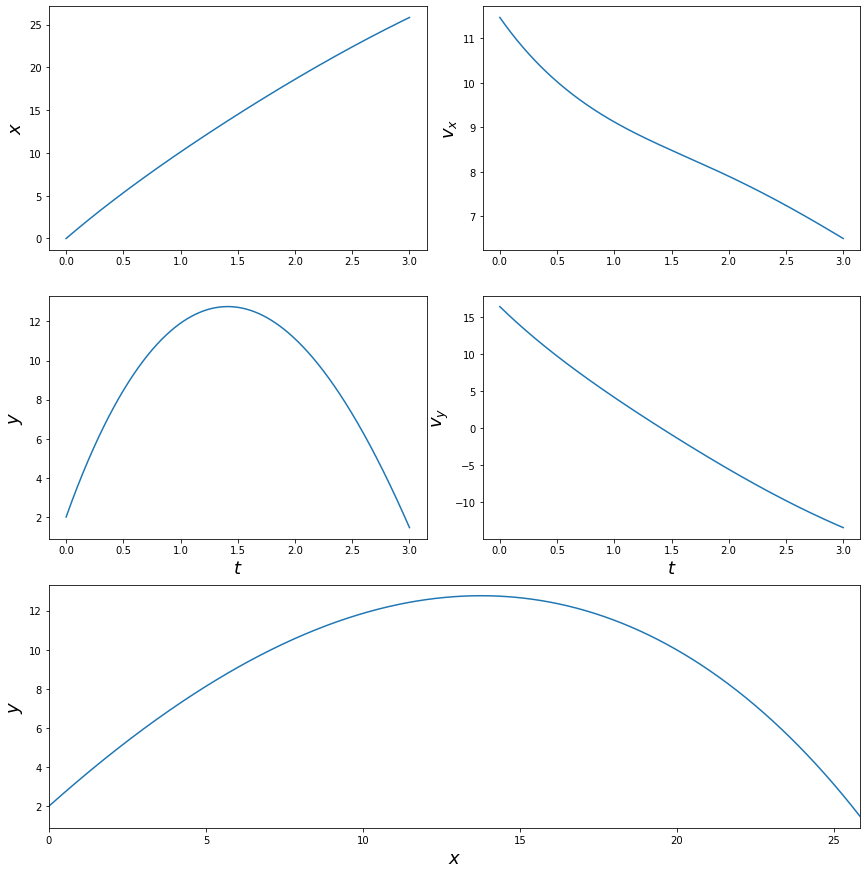

In [17]:
#Plot the results
#Do the formatting first
fig = plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((3,2),(0,0))
ax2 = plt.subplot2grid((3,2),(0,1))
ax3 = plt.subplot2grid((3,2),(1,0))
ax4 = plt.subplot2grid((3,2),(1,1))
ax5 = plt.subplot2grid((3,2),(2,0),colspan=2)
fig.tight_layout(h_pad=2.5,w_pad=2.5)
#Plot x,y,vx,vy
ax1.plot(t,x)
ax1.set_ylabel(r'$x$',fontsize=fs)
ax2.plot(t,vx)
ax2.set_ylabel(r'$v_x$',fontsize=fs)
ax3.plot(t,y)
ax3.set_xlabel(r'$t$',fontsize=fs)
ax3.set_ylabel(r'$y$',fontsize=fs)
ax4.plot(t,vy)
ax4.set_xlabel(r'$t$',fontsize=fs)
ax4.set_ylabel(r'$v_y$',fontsize=fs)
ax5.plot(x,y)
ax5.set_xlabel(r'$x$',fontsize=fs)
ax5.set_ylabel(r'$y$',fontsize=fs)
ax5.set_xlim([x[0],x[-1]])